In [95]:
#!/usr/bin/env python3
import sys

sys.path.append("../../")

from models import NOL
import klein
import numpy as np
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from Layers import KF_Layer, CF_Layer
import matplotlib.pyplot as plt

# This is just to check if the forward pass of the layers work
# using one sample of training image from the MINST; this is quite slow!
transform = transforms.Compose([transforms.ToTensor()])  # convert to tensor
trainset = MNIST(".", train=True, download=True, transform=transform)
digit_five = trainset[0][0]

### Display KF filters and activations

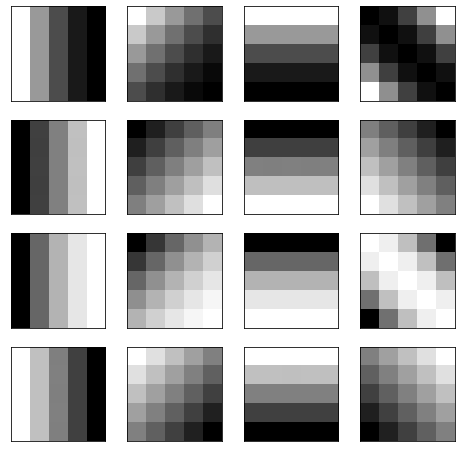

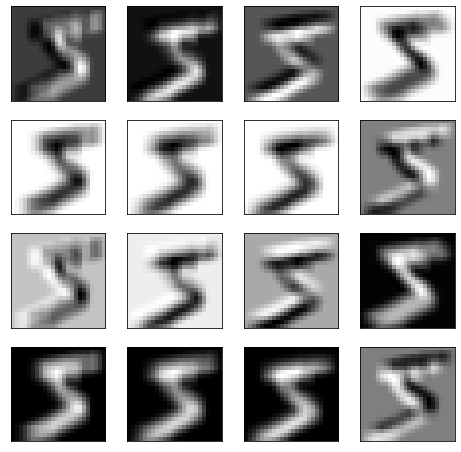

In [51]:
KFLayer = KF_Layer(size=5, slices=16)
kf_activations = KFLayer.forward(digit_five)

fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(KFLayer.filters[i*4+j], cmap=plt.get_cmap("gray"))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()

fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(kf_activations[i*4+j], cmap=plt.get_cmap("gray"))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()

### Display CF filters and activations

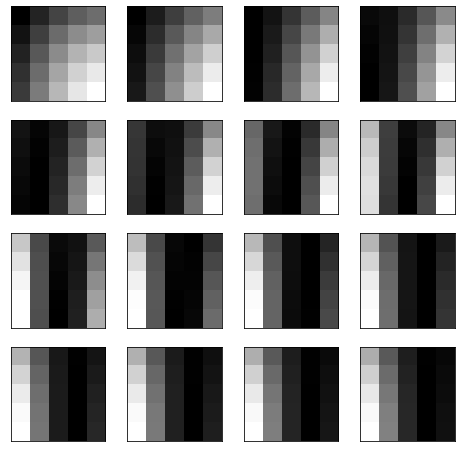

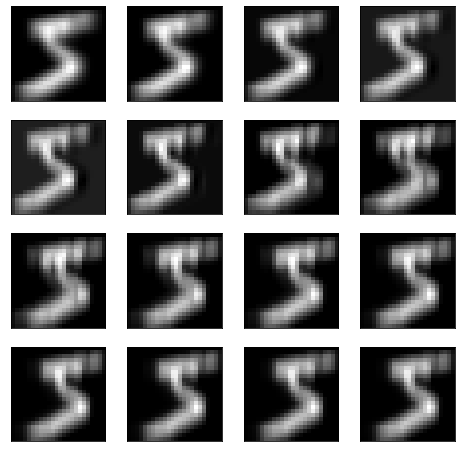

In [52]:
CFLayer = CF_Layer(size=5, slices=16)
cf_activations = CFLayer.forward(digit_five)

fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(CFLayer.filters[i*4+j], cmap=plt.get_cmap("gray"))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()

fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(cf_activations[i*4+j], cmap=plt.get_cmap("gray"))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()

### Display NOL filters and activations

In [105]:
model = NOL(16, 5, 10, (28, 28))
model.load_state_dict(torch.load('2022_05_08_04_01_04_Interpretability_NOL_MINST_weights'))
model.eval()

NOL(
  (convs): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
  )
  (fcs): Sequential(
    (0): Linear(in_features=9216, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)

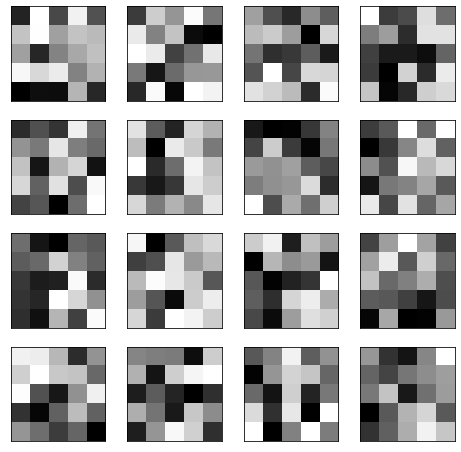

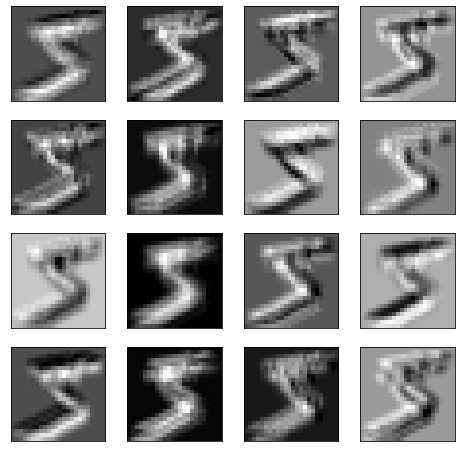

In [121]:
fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.convs[0].weight[i*4+j][0].cpu().detach().numpy(), cmap=plt.get_cmap("gray"))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()

fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.convs[0](digit_five)[i*4+j].cpu().detach().numpy(), cmap=plt.get_cmap("gray"))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
plt.show()